<a href="https://colab.research.google.com/github/talhaanwarch/DeftEval2020/blob/master/schizophrenia_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In this approach data is segmented and feature are calculated for each segment. Then these features are averaged

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
!pip install wfdb
!pip install mne
!pip install nitime
!pip install nolds

In [3]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-0zib6h7c
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-0zib6h7c
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28121 sha256=31d2b625f05e470adee46e756568c50a5e89f3fcedd46daffab4dff77f6b4c97
  Stored in directory: /tmp/pip-ephem-wheel-cache-9nuerf3a/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-mbjur951
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-mbjur951
  Created wheel for entropy: filename=entropy-0.1.0-cp36-none-any.whl size=14098 sha256=7e64e629189f364c5ac84fc2fdc6330b1b5d18e388842a2b55d726a125ecbf1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-aivkbcvb/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy


# Download data

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
cd /content/drive/My Drive/dataset/SchizoPhrenia 14

/content/drive/My Drive/dataset/SchizoPhrenia 14


# Read data

In [6]:
import glob
import os
import mne
import re
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


In [0]:
from scipy import signal
nyq = 0.5 * 250
l=0.2
low = l / nyq
high = 45 / nyq
b, a = signal.butter(4, [low,high], 'band')

In [8]:
HC_files=glob.glob('HC/*.edf')    
HC=[]
for i in HC_files:
    data=mne.io.read_raw_edf(i,preload=True)
    #data.set_eeg_reference('average')
    data=data.get_data()
    data=signal.filtfilt(b, a, data)
   # data=mne.filter.filter_data(data, sfreq=250, l_freq=0.1, h_freq=45)
    #scaler=StandardScaler()        
    #data=scaler.fit_transform(data.T)     
    #data=maxabs_scale(data.T)
    HC.append(data.T)

Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/S

In [9]:
SZ_files=glob.glob('SZ/*.edf')
SZ=[]
for i in SZ_files:
    data=mne.io.read_raw_edf(i,preload=True)
    #data.set_eeg_reference('average')
    data=data.get_data()
    data=signal.filtfilt(b, a, data)
    #data=mne.filter.filter_data(data, sfreq=250, l_freq=0.1, h_freq=45)
    #data=maxabs_scale(data.T)
    SZ.append(data.T)

Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/S

In [0]:
def reshape(data):   
    shape=data.ravel().shape[0]
    s=shape%19000
    if s!=0:
        d=data.ravel()[s//2:-s//2].reshape(-1,1000,19)
        #return np.swapaxes(d,1,2)   
        return d
    else: 
        d1=data.reshape(-1,1000,19)
        #return np.swapaxes(d1,1,2)   
        return d1
        

In [0]:
HC_reshaped=[]
for i in HC:
    HC_reshaped.append(reshape(i))
    
    
SZ_reshaped=[]
for i in SZ:
    SZ_reshaped.append(reshape(i))   

# Libraries

In [0]:
from scipy import stats
import pyeeg
from entropy import *
import pywt
from nitime import algorithms as alg
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import nolds
np.warnings.filterwarnings('ignore')

# Main Features

In [0]:
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
  return np.min(data,axis=0)


def maxim(data):
  return np.max(data,axis=0)


def mean_square(data):
  return np.mean(data**2,axis=0)

def rms(data): #root mean square
  return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])

def wavelet_features(data):
    dwt={}
    for i in range(19):
        dwt[i]=pywt.wavedec(data.T[i],"db1", level=4)
    mean=[]
    tkeo=[]
    std=[]
    for i in dwt.values():
        for j in range(5):
            mean.append(i[j].mean())
            tkeo.append(teager(i[j]))
    return np.array(mean)

def dwt_mean(data):
  mean= wavelet_features(data)
  return mean

        
def hjorth_mobility(data):
    return np.divide(np.std(np.diff(data,axis=0),axis=0),np.std(data,axis=0))

def hjorth_complexity(data):
    return np.divide(hjorth_mobility(np.diff(data,axis=0)),  hjorth_mobility(data))      





In [0]:
def concatenate(data):
    return np.concatenate((std(data) ,rms(data),katz(data)),axis=0)
    

In [0]:
features1=[]
for f in HC_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate(i))
    features1.append(np.mean(np.array(feature),axis=0))

In [0]:
features2=[]
for f in SZ_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate(i))
    features2.append(np.mean(np.array(feature),axis=0))

In [81]:
x1=np.array(features1)        
x2=np.array(features2)      

X=np.concatenate((x1,x2),axis=0)

y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))
X.shape

(28, 57)

# Classification

In [0]:
#%% split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42,stratify=y)

In [0]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [84]:

clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83         5
         1.0       1.00      0.50      0.67         4

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9

accuracy is  0.7777777777777778


# Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = SVC(kernel="rbf")
Cs = [ 1,2,3,5,7,10,15,30,50,70,100]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.8333333333333334


{'classifier__C': 30, 'classifier__gamma': 0.001}

### NuSVM

In [86]:
from sklearn.svm import SVC, LinearSVC, NuSVC

clf = NuSVC(kernel="rbf")
nu = [0.1,0.3,0.5,0.7,1]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__nu=nu,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.8166666666666668


{'classifier__gamma': 0.001, 'classifier__nu': 0.7}

### LR

In [87]:
clf = LogisticRegression()
C = [ 1,2,3,5,7,10,15,30,50,70,100]
penalty=["l1","l2"]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=C,classifier__penalty=penalty),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.8333333333333334


{'classifier__C': 1, 'classifier__penalty': 'l2'}

### KNN

In [88]:

clf = KNeighborsClassifier()

n_neighbors  = [ 3,4,5,6,7,8,9]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 
results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7333333333333333


{'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 5,
 'classifier__weights': 'uniform'}

# Cross Validation

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [0]:
classifiers = [
    KNeighborsClassifier(n_neighbors=4,weights='distance',metric='minkowski'),
    SVC(kernel="rbf",C=1,gamma=0.1),
    NuSVC(nu=0.1,gamma=0.1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(C=1,penalty='l2')]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', sc),('estimator', clf)])


In [92]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy=[]
accuracy_std=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 70.0000%
SVC
****Results****
Accuracy: 73.3333%
NuSVC
****Results****
Accuracy: 70.0000%
DecisionTreeClassifier
****Results****
Accuracy: 58.3333%
RandomForestClassifier
****Results****
Accuracy: 76.6667%
AdaBoostClassifier
****Results****
Accuracy: 83.3333%
GradientBoostingClassifier
****Results****
Accuracy: 68.3333%
GaussianNB
****Results****
Accuracy: 61.6667%
LinearDiscriminantAnalysis
****Results****
Accuracy: 65.0000%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 53.3333%
LogisticRegression
****Results****
Accuracy: 83.3333%


Text(0.5, 1.0, 'Classifiers')

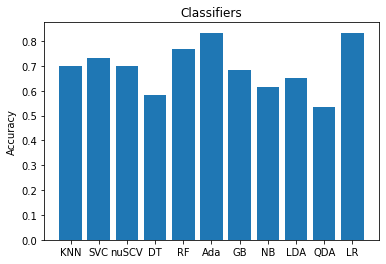

In [93]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
plt.xticks(y_pos, classifier)
plt.ylabel('Accuracy')
plt.title('Classifiers')

# Principle Component Analysis

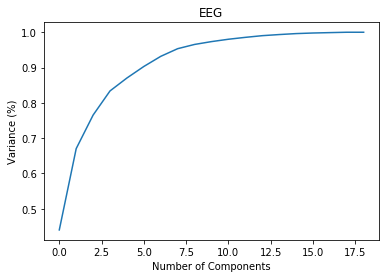

In [94]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('EEG')
plt.show()

In [0]:
clf = SVC(kernel='rbf')
pca = PCA(n_components=10)

#pipeline = Pipeline([('selector',pca), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',pca), ('estimator', clf)])


In [96]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_pca=[]
std_pca=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_pca.append(np.array(scores).mean())
    std_pca.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 70.0000%
SVC
****Results****
Accuracy: 73.3333%
NuSVC
****Results****
Accuracy: 73.3333%
DecisionTreeClassifier
****Results****
Accuracy: 61.6667%
RandomForestClassifier
****Results****
Accuracy: 63.3333%
AdaBoostClassifier
****Results****
Accuracy: 60.0000%
GradientBoostingClassifier
****Results****
Accuracy: 65.0000%
GaussianNB
****Results****
Accuracy: 68.3333%
LinearDiscriminantAnalysis
****Results****
Accuracy: 78.3333%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 71.6667%
LogisticRegression
****Results****
Accuracy: 78.3333%


In [97]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel="rbf")
n_components = [5,10,15,20]
Cs = [0.001,0.1, 1,2,3,5,7,10,15,30]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.8666666666666668


{'classifier__C': 1, 'classifier__gamma': 0.3, 'selector__n_components': 20}

In [98]:
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
n_components = [5,10,15,20]
n_neighbors  = [ 3,4,5,6,7,8,9]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.75


{'classifier__metric': 'manhattan',
 'classifier__n_neighbors': 4,
 'classifier__weights': 'distance',
 'selector__n_components': 20}

# RFE

In [0]:
from sklearn.feature_selection import RFE


In [0]:

clf = SVC(kernel='rbf')
rfe=RFE(SVC(kernel='linear'),n_features_to_select=5,step=1,verbose=0)   

#pipeline = Pipeline([('selector',rfe), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',rfe), ('estimator', clf)])


In [101]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_rfe=[]
std_rfe=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_rfe.append(np.array(scores).mean())
    std_rfe.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 65.0000%
SVC
****Results****
Accuracy: 65.0000%
NuSVC
****Results****
Accuracy: 68.3333%
DecisionTreeClassifier
****Results****
Accuracy: 63.3333%
RandomForestClassifier
****Results****
Accuracy: 65.0000%
AdaBoostClassifier
****Results****
Accuracy: 71.6667%
GradientBoostingClassifier
****Results****
Accuracy: 65.0000%
GaussianNB
****Results****
Accuracy: 73.3333%
LinearDiscriminantAnalysis
****Results****
Accuracy: 68.3333%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 75.0000%
LogisticRegression
****Results****
Accuracy: 75.0000%


# SKbest

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [0]:

clf = SVC(kernel='rbf')
skbest=SelectKBest(f_classif, k=10)
#pipeline = Pipeline([('selector',skbest), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',rfe), ('estimator', clf)])


In [104]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_kbest=[]
std_kbest=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_kbest.append(np.array(scores).mean())
    std_kbest.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 65.0000%
SVC
****Results****
Accuracy: 65.0000%
NuSVC
****Results****
Accuracy: 68.3333%
DecisionTreeClassifier
****Results****
Accuracy: 56.6667%
RandomForestClassifier
****Results****
Accuracy: 80.0000%
AdaBoostClassifier
****Results****
Accuracy: 75.0000%
GradientBoostingClassifier
****Results****
Accuracy: 68.3333%
GaussianNB
****Results****
Accuracy: 73.3333%
LinearDiscriminantAnalysis
****Results****
Accuracy: 68.3333%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 75.0000%
LogisticRegression
****Results****
Accuracy: 75.0000%


# VarianceThreshold

In [0]:
from sklearn.feature_selection import VarianceThreshold
clf = SVC(kernel='rbf')
selector = VarianceThreshold(0.05)
#pipeline = Pipeline([('selector',algo), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',selector), ('estimator', clf)])


In [106]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_var=[]
std_var=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_var.append(np.array(scores).mean())
    std_var.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 70.0000%
SVC
****Results****
Accuracy: 73.3333%
NuSVC
****Results****
Accuracy: 70.0000%
DecisionTreeClassifier
****Results****
Accuracy: 58.3333%
RandomForestClassifier
****Results****
Accuracy: 68.3333%
AdaBoostClassifier
****Results****
Accuracy: 83.3333%
GradientBoostingClassifier
****Results****
Accuracy: 65.0000%
GaussianNB
****Results****
Accuracy: 61.6667%
LinearDiscriminantAnalysis
****Results****
Accuracy: 65.0000%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 53.3333%
LogisticRegression
****Results****
Accuracy: 83.3333%


# Result

In [107]:
len(accuracy),len(accuracy_pca),len(accuracy_rfe),len(accuracy_kbest),len(accuracy_var)

(11, 11, 11, 11, 11)

In [0]:
result=pd.DataFrame([accuracy,accuracy_pca,accuracy_rfe,accuracy_kbest,accuracy_var],
                    index=['Accuracy','PCA',"RFE",'kbest','VAR'],
                    columns=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR'])

In [0]:
result=result.T

In [110]:

def _color_red_or_green(val):
    color = 'red' if val < 0.7 else 'green'
    return 'color: %s' % color
result.style.applymap(_color_red_or_green)

,Accuracy,PCA,RFE,kbest,VAR
KNN,0.7,0.7,0.65,0.65,0.7
SVC,0.733333,0.733333,0.65,0.65,0.733333
nuSCV,0.7,0.733333,0.683333,0.683333,0.7
DT,0.583333,0.616667,0.633333,0.566667,0.583333
RF,0.766667,0.633333,0.65,0.8,0.683333
Ada,0.833333,0.6,0.716667,0.75,0.833333
GB,0.683333,0.65,0.65,0.683333,0.65
NB,0.616667,0.683333,0.733333,0.733333,0.616667
LDA,0.65,0.783333,0.683333,0.683333,0.65
QDA,0.533333,0.716667,0.75,0.75,0.533333
